In [235]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [236]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [237]:
# Looking for NaN
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [238]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [239]:
Nunique = attrition.nunique()
Nunique = Nunique.sort_values()
Nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

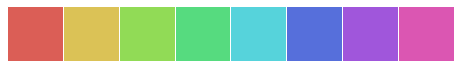

In [240]:
sns.palplot(sns.color_palette("hls", 8))
plt.show() 

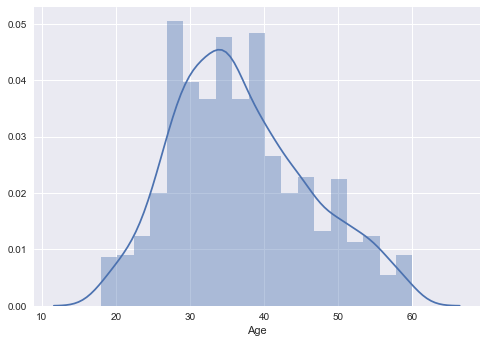

In [241]:
sns.distplot(attrition['Age'])
plt.show() 

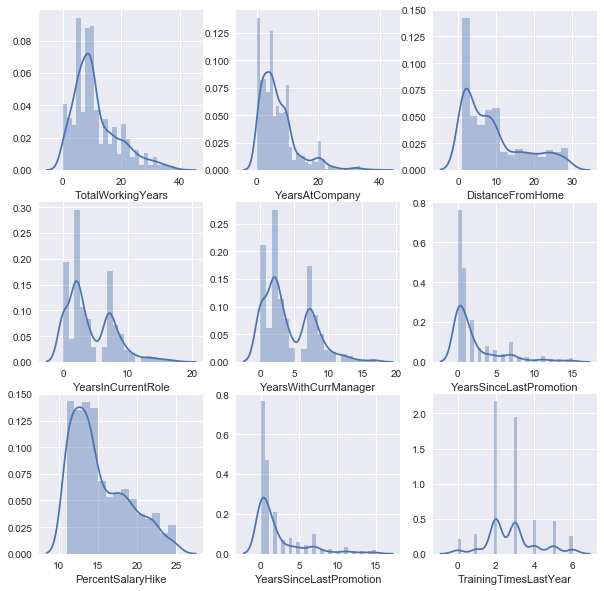

In [242]:
#  Plot areas are called axes

fig,ax = plt.subplots(3,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(attrition['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(attrition['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(attrition['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(attrition['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(attrition['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(attrition['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(attrition['TrainingTimesLastYear'], ax = ax[2,2]) 
plt.show()

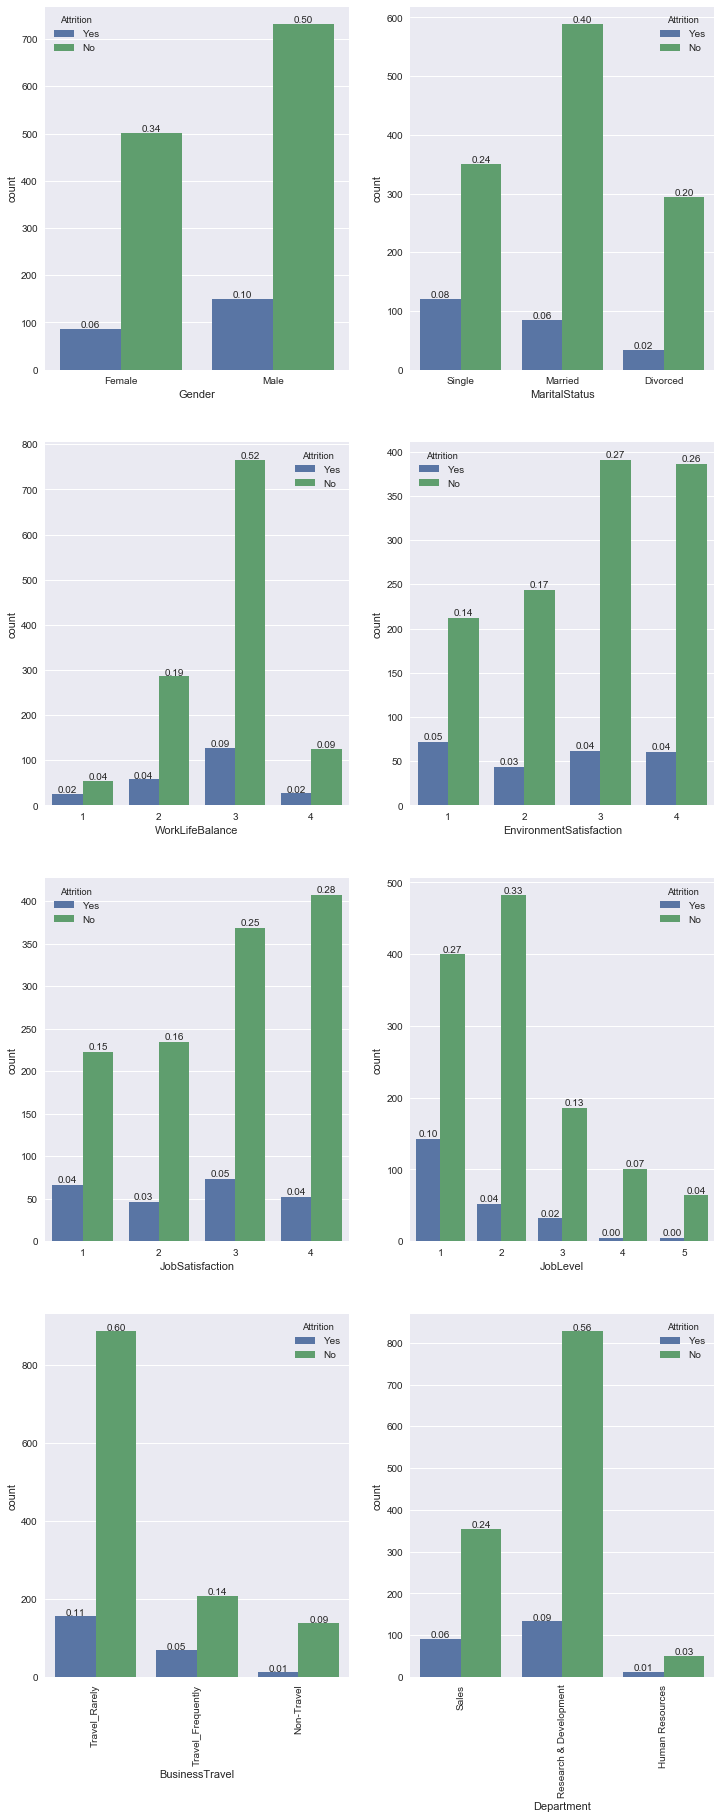

In [243]:
total_records= len(attrition)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=attrition,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

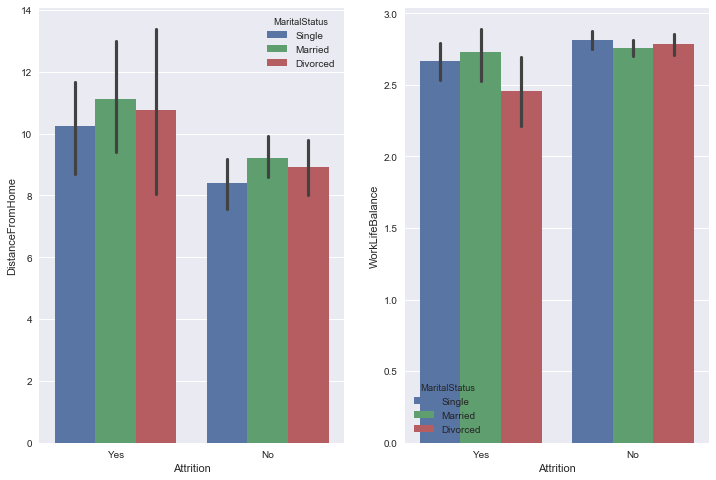

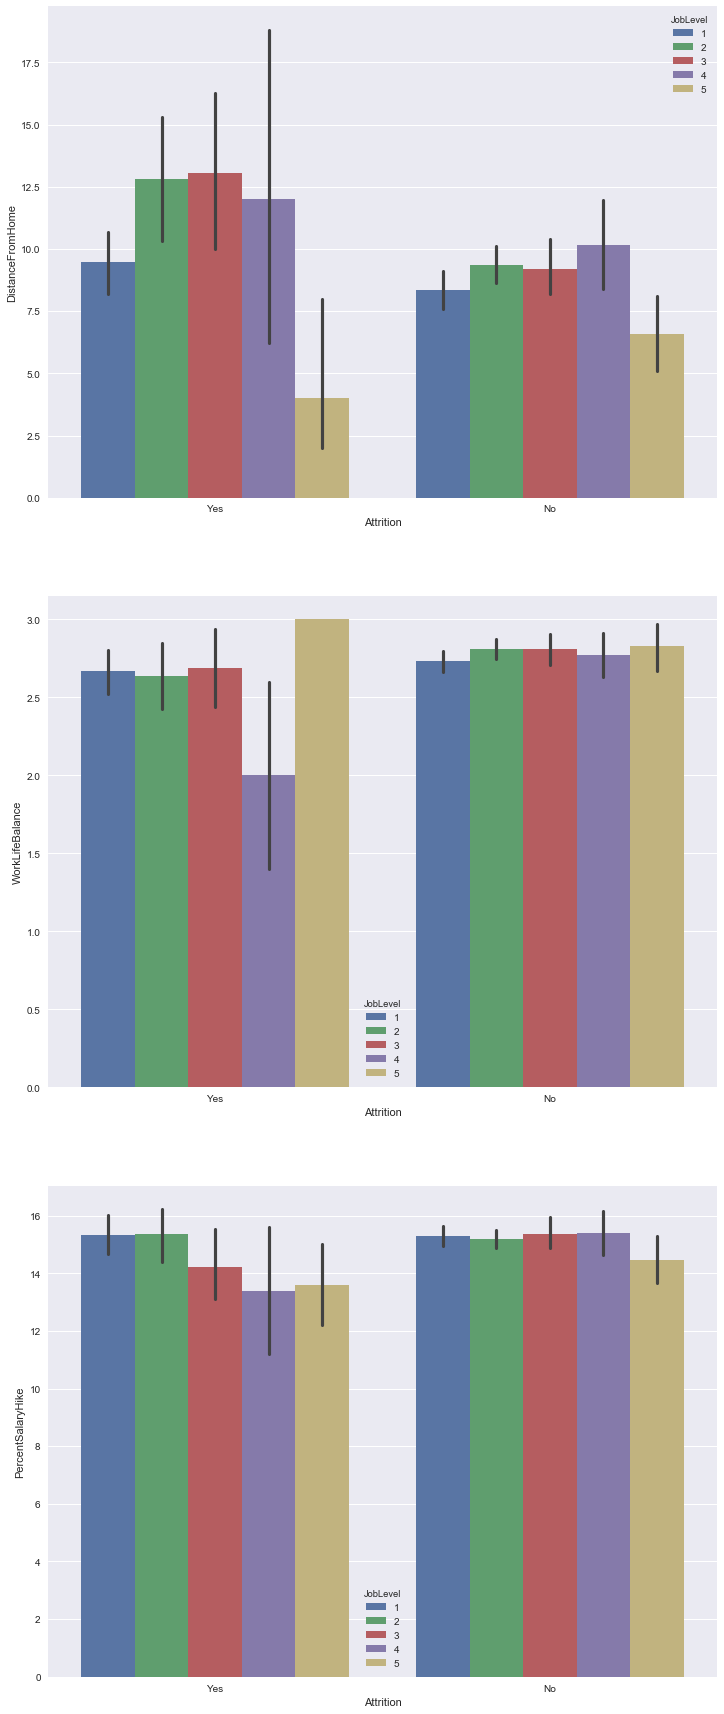

In [244]:
# MaritalStatus wise
columns = ["DistanceFromHome",
"WorkLifeBalance"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(1,2,j)
    sns.barplot(x = 'Attrition', y = attrition[i], hue="MaritalStatus", data =attrition)

#plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

#JobLevel wise
columns = ["DistanceFromHome",
"WorkLifeBalance",
"PercentSalaryHike"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(3,1,j)
    sns.barplot(x = 'Attrition', y = attrition[i], hue="JobLevel", data =attrition)

plt.subplots_adjust(bottom=-0.9, top=2)

plt.show()

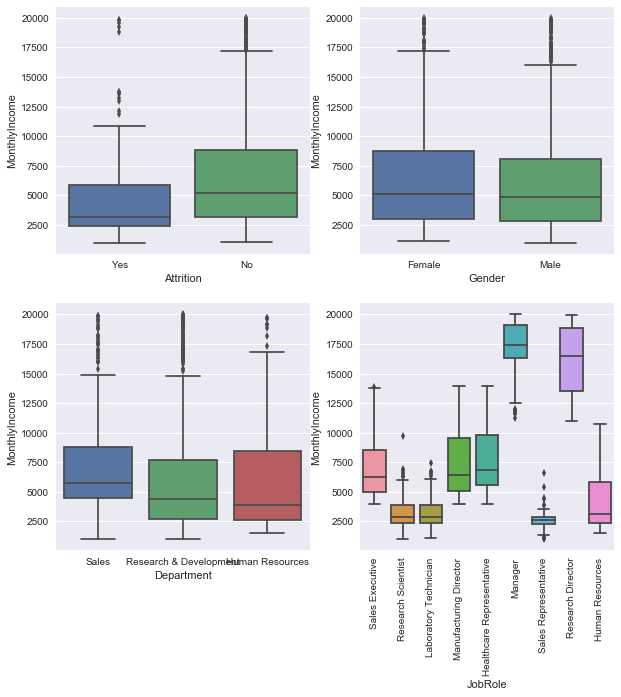

In [245]:
# Display multiple box plots.
#  Plot areas are called axes

fig,ax = plt.subplots(2,2, figsize=(10,10))                       # 'ax' has references to all the four axes
sns.boxplot(attrition['Attrition'], attrition['MonthlyIncome'], ax = ax[0,0])  # Plot on 1st axes 
sns.boxplot(attrition['Gender'], attrition['MonthlyIncome'], ax = ax[0,1])  # Plot on IInd axes
plt.xticks( rotation=90)
sns.boxplot(attrition['Department'], attrition['MonthlyIncome'], ax = ax[1,0])       # Plot on IIIrd axes
plt.xticks( rotation=90)

sns.boxplot(attrition['JobRole'], attrition['MonthlyIncome'], ax = ax[1,1])     # Plot on IV the axes
plt.show()

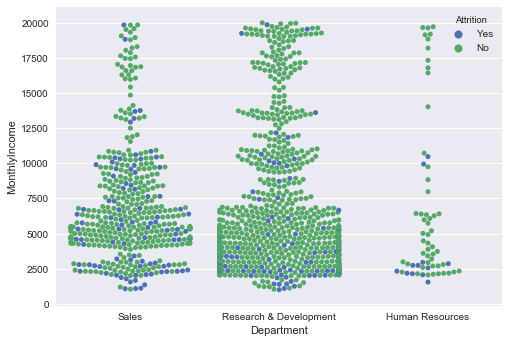

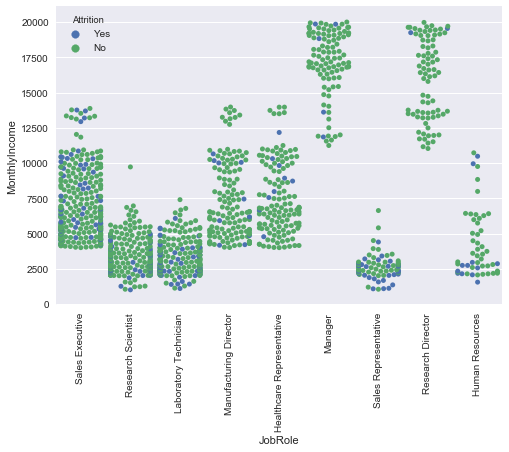

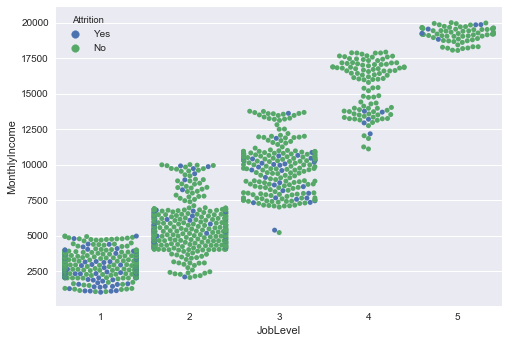

In [246]:
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=attrition);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=attrition);
plt.xticks( rotation=90 )
plt.show()

sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=attrition);
plt.show()

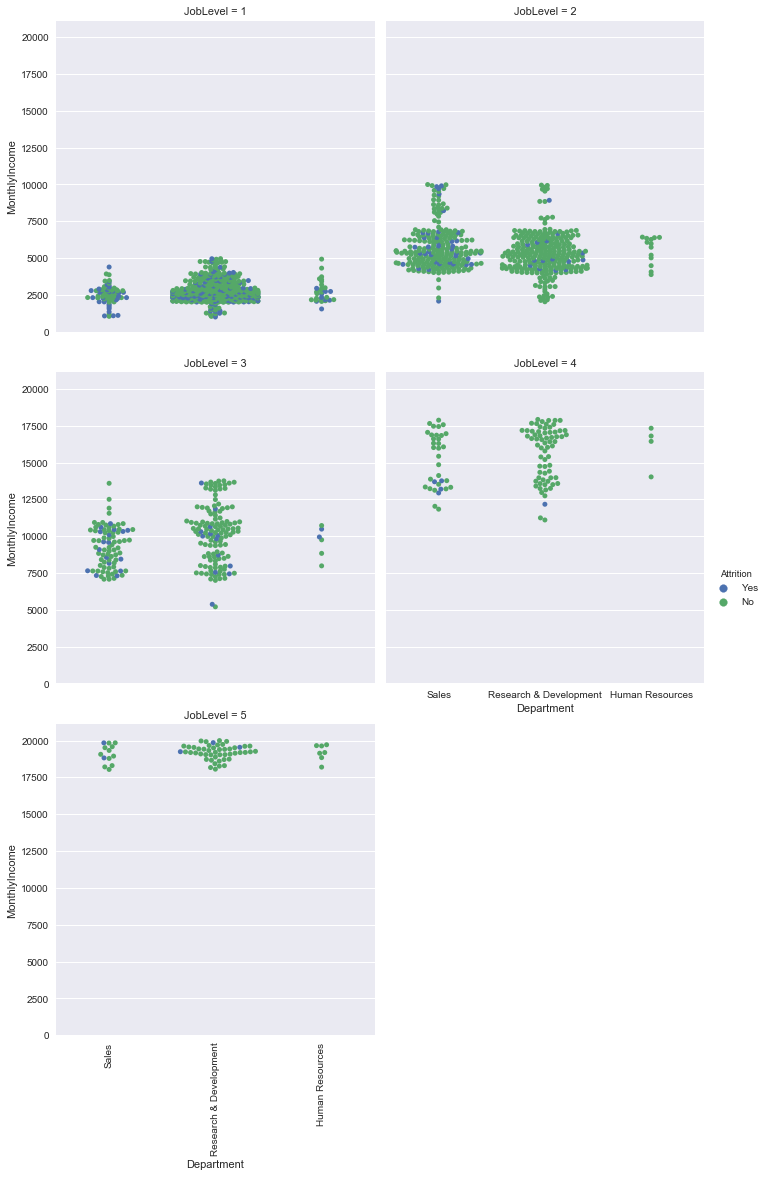

In [247]:
sns.factorplot(x =   'Department',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'Attrition',    # Categorical
               col = 'JobLevel',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'swarm',
               data = attrition)
plt.xticks( rotation=90 )
plt.show()

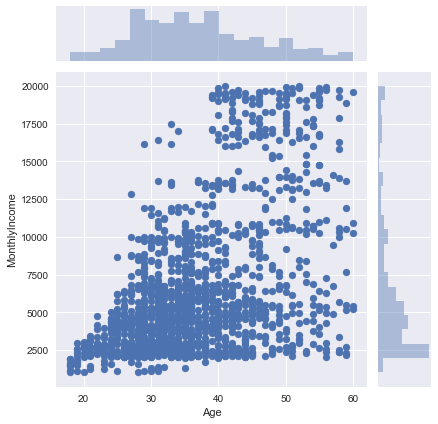

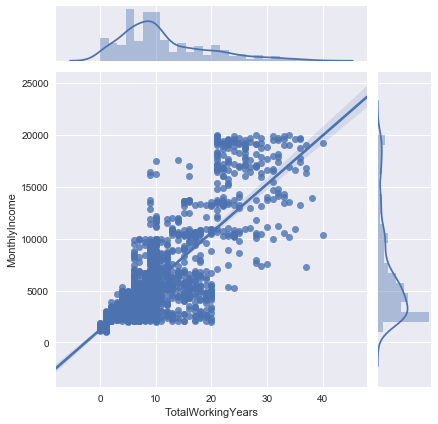

In [248]:
## Joint scatter plot
sns.jointplot(attrition.Age,attrition.MonthlyIncome, kind = "scatter")   
plt.show()

#Joint scatter plot with least square line
sns.jointplot(attrition.TotalWorkingYears,attrition.MonthlyIncome, kind = "reg")   
plt.show()

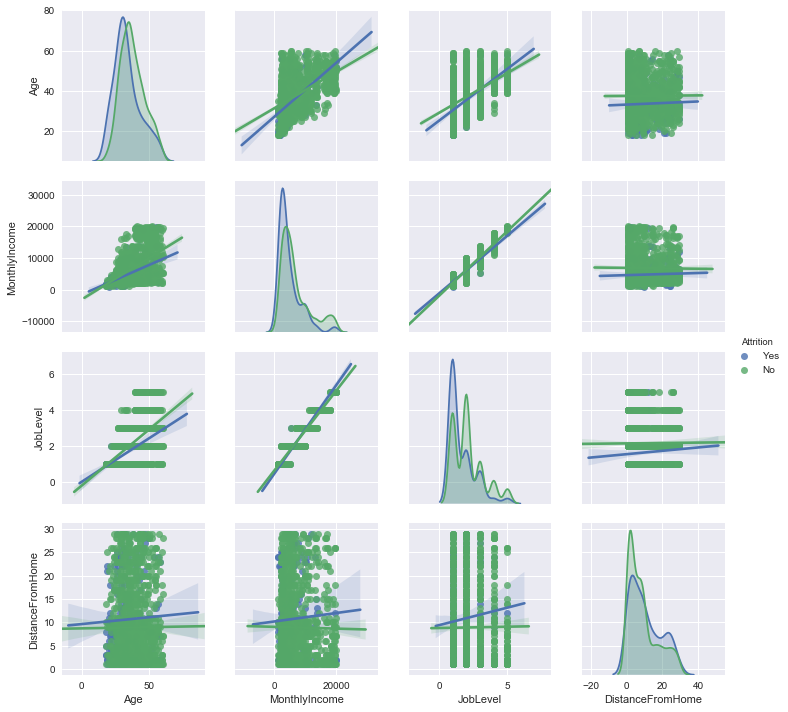

In [249]:
cont_col= ['Attrition','Age','MonthlyIncome', 'JobLevel','DistanceFromHome']
sns.pairplot(attrition[cont_col],  kind="reg", diag_kind = "kde"  , hue = 'Attrition' )
plt.show()

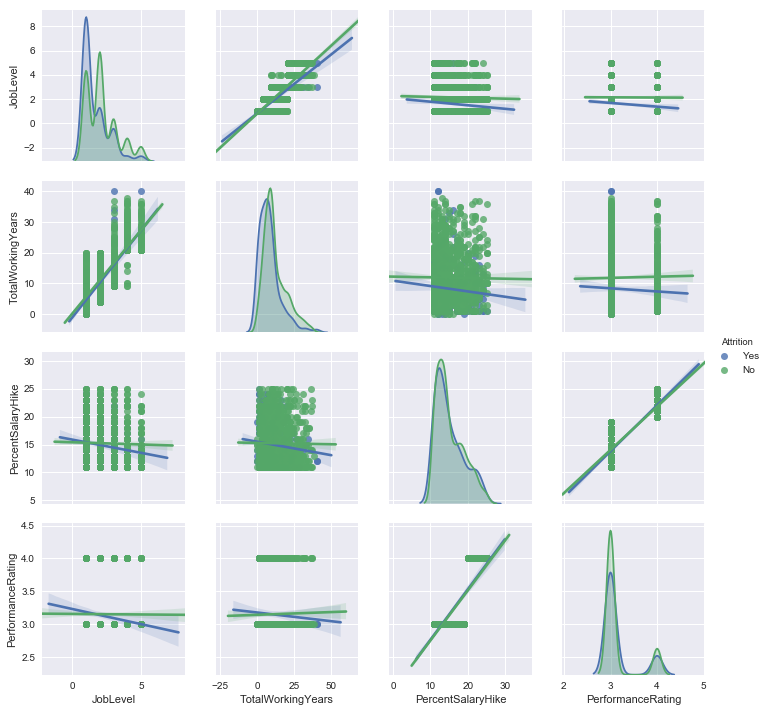

In [250]:
cont_col= ['Attrition','JobLevel','TotalWorkingYears', 'PercentSalaryHike','PerformanceRating']
sns.pairplot(attrition[cont_col], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

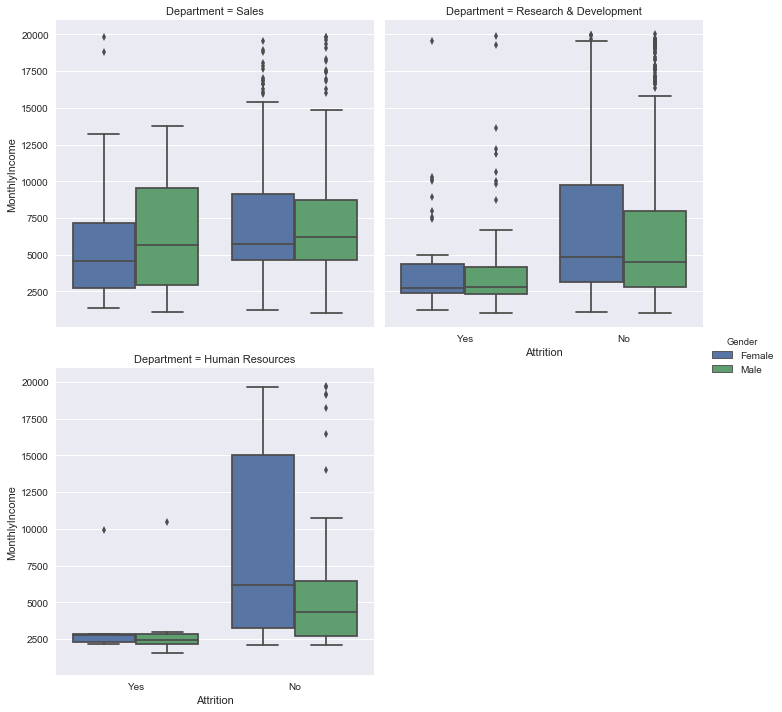

In [251]:
sns.factorplot(x =   'Attrition',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'Gender',    # Categorical
               col = 'Department',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = attrition)
plt.show()

## Usando Métrica de Eficiência

In [252]:
dataset = pd.read_csv('MFG10YearTerminationData.csv')
dataset.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [253]:
mapping = {'ACTIVE': 1, 'TERMINATED': 0}   # Convert the categorical object into numerical
dataset = dataset.replace({'STATUS': mapping})
y = dataset.STATUS

In [254]:
# Create the predictors dataset

features = ['age', 'length_of_service', 'gender_full', 'STATUS_YEAR', 'BUSINESS_UNIT']
X = dataset[features]

In [255]:
# The gender, business unit are nominal, so they will
# be exploded instead of being converted to ordinal values

dummy_cols = ['gender_full', 'BUSINESS_UNIT']
X = pd.get_dummies(X, columns=dummy_cols)

In [256]:
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [257]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predlc = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmlg = confusion_matrix(y_test, y_predlc)

score = classifier.score(X_test, y_test)
print('Logistic model score is %0.4f' %score)
cmlg

Logistic model score is 0.9686


array([[    0,   468],
       [    0, 14428]], dtype=int64)

In [258]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predrfc = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmrfc = confusion_matrix(y_test, y_predrfc)

score = classifier.score(X_test, y_test)
print('Random Forest model score is %0.4f' %score)
cmrfc

Random Forest model score is 0.9881


array([[  323,   145],
       [   32, 14396]], dtype=int64)

In [259]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predsvm = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmkvc = confusion_matrix(y_test, y_predsvm)
score = classifier.score(X_test, y_test)
print('Kernel SVM model score is %0.4f' %score)
cmkvc

Kernel SVM model score is 0.9881


array([[  294,   174],
       [    3, 14425]], dtype=int64)

In [260]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predknn = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test, y_predknn)
score = classifier.score(X_test, y_test)
print('KNN model score is %0.4f' %score)
cmknn

KNN model score is 0.9873


array([[  329,   139],
       [   50, 14378]], dtype=int64)

In [261]:
# Fitting xgboost

from xgboost import XGBRegressor
xgboost = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
xgboost.fit(X_train,y_train,verbose=False)

# Predicting the Test set results
y_predxgboost = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmxgboost = confusion_matrix(y_test, y_predxgboost)
score = classifier.score(X_test, y_test)
print('XGBoost model score is %0.4f' %score)
cmxgboost

XGBoost model score is 0.9873


array([[  329,   139],
       [   50, 14378]], dtype=int64)

## Nova implementação de teste

In [262]:
df = pd.read_csv('MFG10YearTerminationData.csv')

In [263]:
# Check size of the dataset
df.shape

(49653, 18)

In [264]:
# Data types
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [265]:
# A prelimiary look at the individual columns in the training set
df.head(100)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [266]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [267]:
# Summarise the numerical data
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,"49,653.00","49,653.00","49,653.00","49,653.00","49,653.00"
mean,"4,859.50",42.08,10.43,27.30,"2,010.61"
std,"1,826.57",12.43,6.33,13.51,2.85
min,"1,318.00",19.00,0.00,1.00,"2,006.00"
25%,"3,360.00",31.00,5.00,16.00,"2,008.00"
50%,"5,031.00",42.00,10.00,28.00,"2,011.00"
75%,"6,335.00",53.00,15.00,42.00,"2,013.00"
max,"8,336.00",65.00,26.00,46.00,"2,015.00"


In [268]:
# Summarise the non-numerical data
df.describe(include=['O'])

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,130,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,4/27/1956,2/22/1995,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,40,50,42450,11211,10269,9984,25898,25898,48168,48168,48168,49068


In [269]:
# Look at full list of job titles and frequency
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Accounts Receiveable Clerk           30
Labor Relations Analyst              30
Trainer                              26
Accounts Payable Clerk               25
Compensation Analyst                 20
Auditor                              20
Investment Analyst                   20
Systems Analyst                      20
Corporate Lawyer                     17


In [270]:
# The 47 jobs can be separated according to corporate hierarchy
# Use employee, manager, and combined executives and board 
employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

# Check all jobs were entered into the categories
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, 'out of 47')

Total jobs categorised: 47 out of 47


In [271]:
# Make a copy of job titles in a new column
df['Hierarchy'] = df.job_title

# Replace the job titles in Hierarchy
# The corporate hierarchy intrinsically has order from small to large, 
# so ordinal numbers may be used
df.Hierarchy = df.Hierarchy.replace(employee, 0)
df.Hierarchy = df.Hierarchy.replace(manager, 1)
df.Hierarchy = df.Hierarchy.replace(executive, 2)
df.Hierarchy = df.Hierarchy.replace(board, 3)

# Check that the replacement went to plan
df.Hierarchy.value_counts()

0    47739
1     1749
3      105
2       60
Name: Hierarchy, dtype: int64

In [272]:
# Look at full list of departments and frequency
df.department_name.value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Audit                        24
Investment                   24
Compensation                 24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [273]:
# The departments can be separated according to whether they serve the customer
# or the business
serve_cus = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

serve_biz = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

# Check all departments were entered into the categories
total = len(serve_cus) + len(serve_biz)
print('Total departments categorised:', total, 'out of 21')

Total departments categorised: 21 out of 21


In [274]:
# Make a copy of department names in a new column
df['Service_to'] = df.department_name

# Replace the department names in Service_to
df.Service_to = df.Service_to.replace(serve_cus, 'Customer')
df.Service_to = df.Service_to.replace(serve_biz, 'Business')

# Check the replacement went to plan
df.Service_to.value_counts()

Customer    48797
Business      856
Name: Service_to, dtype: int64

In [275]:
# Look at full list of cities and frequency
df.city_name.value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

In [276]:
# The cities are in Canada.
# The cities can be separated according to population size.

# The population data for 2011 was obtained from Statistics Canada
# http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E
# Used 2011 as it is the most recent before the last year of this dataset (2015)
city_pop_2011 = {'Vancouver':2313328,
                 'Victoria':344615,
                 'Nanaimo':146574,
                 'New Westminster':65976,
                 'Kelowna':179839,
                 'Burnaby':223218,
                 'Kamloops':85678,
                 'Prince George':71974,
                 'Cranbrook':19319,
                 'Surrey':468251,
                 'Richmond':190473,
                 'Terrace':11486,
                 'Chilliwack':77936,
                 'Trail':7681,
                 'Langley':25081,
                 'Vernon':38180,
                 'Squamish':17479,
                 'Quesnel':10007,
                 'Abbotsford':133497,
                 'North Vancouver':48196,
                 'Fort St John':18609,
                 'Williams Lake':10832,
                 'West Vancouver':42694,
                 'Port Coquitlam':55985,
                 'Aldergrove':12083,
                 'Fort Nelson':3561,
                 'Nelson':10230,
                 'New Westminister':65976,
                 'Grand Forks':3985,
                 'White Rock':19339,
                 'Haney':76052,
                 'Princeton':2724,
                 'Dawson Creek':11583,
                 'Bella Bella':1095,
                 'Ocean Falls':129,
                 'Pitt Meadows':17736,
                 'Cortes Island':1007,
                 'Valemount':1020,
                 'Dease Lake':58,
                 'Blue River':215}
# Population notes
# New Westminister is treated as a misspelling of New Westminster
# Used Haney in Maple Ridge, British Columbia because most of the other cities are in BC
# Used Bella Bella 1 (Indian reserve) for Bella Bella
# Used Central Coast A for Ocean Falls 
# Used Strathcona B for Cortes Island
# Used Dease Lake 9 (Indian reserve) for Dease Lake

# Check dictionary made correctly
print('Cities in dictionary:', len(city_pop_2011), 'out of 40')

Cities in dictionary: 40 out of 40


In [277]:
# Make a copy of city names
df['Pop'] = df.city_name

# Map from city name to population
df.Pop = df.Pop.map(city_pop_2011)

# Make a new column for population category
df['Pop_category'] = df.Pop

# Categorise according to population size
# >= 100,000 is City
# 10,000 to 99,999 is Rural
# < 10,000 is Remote
# Guidance from Australian Institute of Health and Welfare
# http://www.aihw.gov.au/rural-health-rrma-classification/
city_ix = (df['Pop'] >= 100000)
rural_ix = ((df['Pop'] < 100000) & (df['Pop'] >= 10000))
remote_ix = (df['Pop'] < 10000)
df.loc[city_ix, 'Pop_category'] = 'City'
df.loc[rural_ix, 'Pop_category'] = 'Rural'
df.loc[remote_ix, 'Pop_category'] = 'Remote'

# Check the replacement went to plan
df.Pop_category.value_counts()

City      28194
Rural     19542
Remote     1917
Name: Pop_category, dtype: int64

In [278]:
# As the category names are based on population size, the data could be represented
# by an ordinal category instead of a nominal category.
# Convert from nominal to ordinal 
df.Pop_category = df.Pop_category.replace('Remote', 0)
df.Pop_category = df.Pop_category.replace('Rural', 1)
df.Pop_category = df.Pop_category.replace('City', 2)

# Check the replacement went to plan
df.Pop_category.value_counts()

2    28194
1    19542
0     1917
Name: Pop_category, dtype: int64

In [279]:
# Convert STATUS from string to numerical
df.STATUS = df.STATUS.map({'ACTIVE':1, 'TERMINATED':0})

In [280]:
# Separate data to avoid one excessively overlapping the other in plots.
# One set for the terminated (out of company) and working (in company)
out_of_co = df[df.STATUS == 0]
in_co = df[df.STATUS == 1]

Text(0.5,1,'In company')

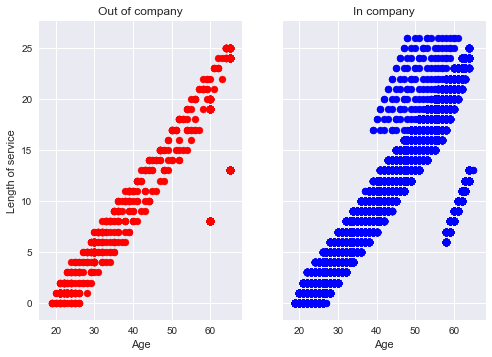

In [281]:
# Start with a broad look at each group in terms of age and length of service
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.scatter(out_of_co.age, out_of_co.length_of_service, color='r')
ax1.set_xlabel('Age')
ax1.set_ylabel('Length of service')
ax1.set_title('Out of company')

ax2.scatter(in_co.age, in_co.length_of_service, color='b')
ax2.set_xlabel('Age')
ax2.set_title('In company')

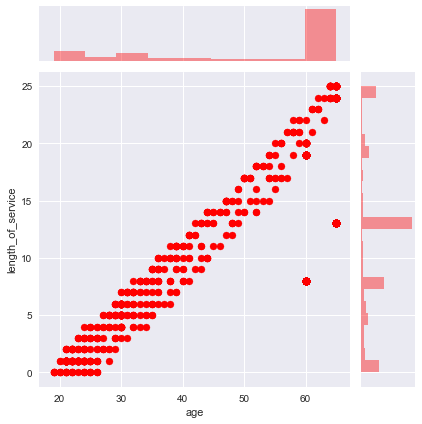

In [282]:
# Scatter plot of out of company dataset, with histograms of the axes
g = sns.jointplot(out_of_co.age, out_of_co.length_of_service, color='r')

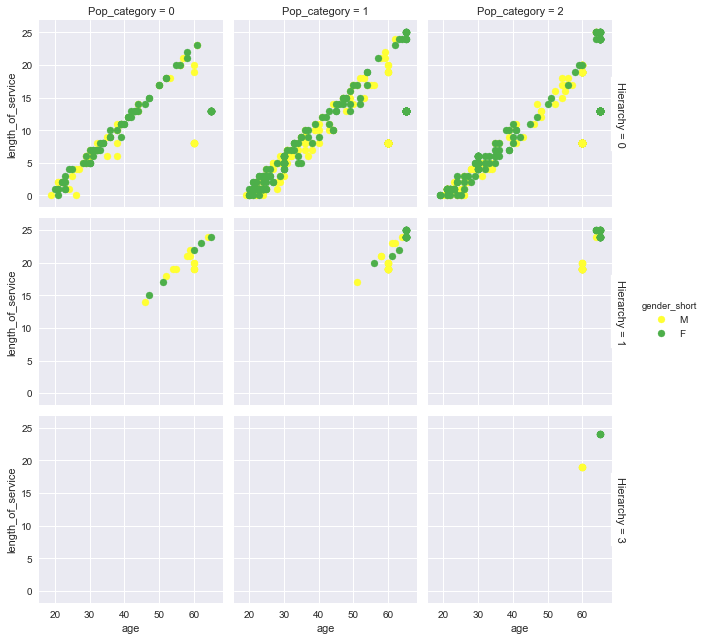

In [283]:
# When someone leaves the company, look at their age, length of service, city size,
# and position in hierarchy. Separated by gender
g = sns.FacetGrid(out_of_co, col='Pop_category', row='Hierarchy', palette='Set1_r', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

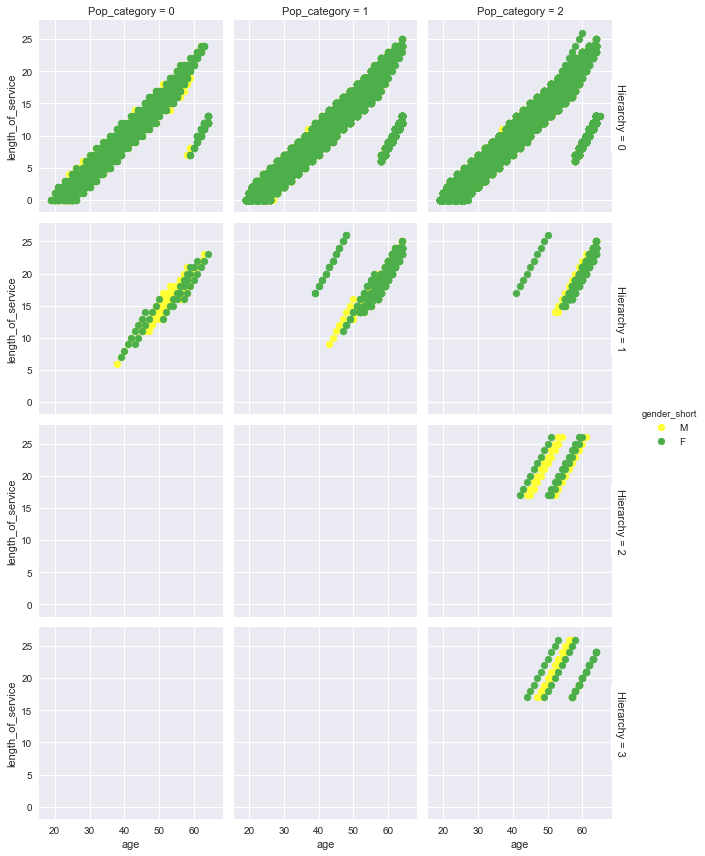

In [284]:
# Do the same for people who are working in the company
g = sns.FacetGrid(in_co, col='Pop_category', row='Hierarchy', palette='Set1_r', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

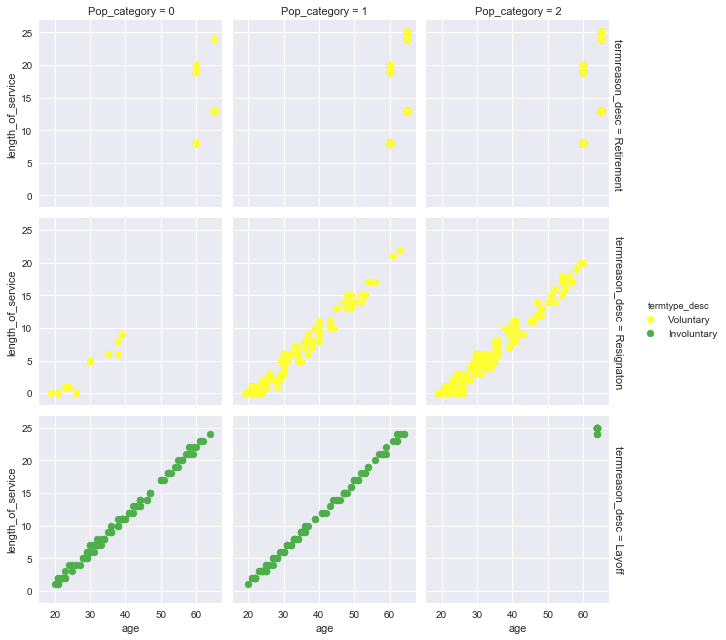

In [285]:
# Out of interest, look at when termination is voluntary or involuntary
g = sns.FacetGrid(out_of_co, col='Pop_category', row='termreason_desc', palette='Set1_r', 
                  hue='termtype_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

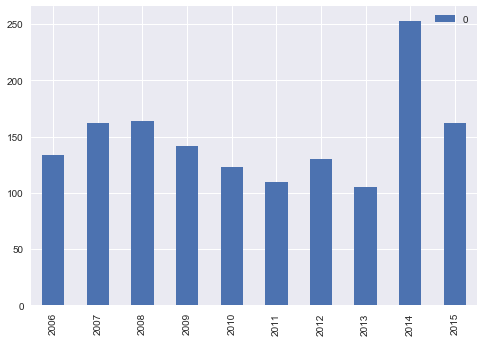

In [286]:
from collections import Counter

# Out of interest, look at number of terminations per year.
# Count terminations per year
term_per_year = Counter(out_of_co.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

In [287]:
# Preprocessing for machine learning models

# Drop the employee ID, record date, birth date, termination date, termination reason, 
# termination type, gender_full, STATUS_YEAR, and store_name features
# Also drop job_title (replaced with Hierarchy), department_name (replaced with Service_to),
# and city_name and Pop (replaced with Pop_category)
drop_cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
             'terminationdate_key', 'gender_full', 'termreason_desc',
             'termtype_desc', 'STATUS_YEAR', 'store_name', 'job_title', 'department_name',
             'city_name', 'Pop']

df = df.drop(drop_cols, axis=1)

In [288]:
# The gender, business unit and Service_to categories are nominal, so they will
# be exploded instead of being converted to ordinal values
dummy_cols = ['gender_short', 'BUSINESS_UNIT', 'Service_to']
df = pd.get_dummies(df, columns=dummy_cols)

In [289]:
# Separate the label from the dataset
label = df.STATUS
df = df.drop('STATUS', axis=1)

In [290]:
# Machine learning classification models

# Only age and length of service have double digit values. It should be okay to
# leave the values at their normal scales.

# Split data for training and testing. Specify random state for repeatability.
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,
                                                    random_state=10)

In [291]:
# KNN
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('KNN model score is %0.4f' %score)

KNN model score is 0.9869


In [292]:
# SVC
model = SVC(C=1, kernel='rbf', random_state=10)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('SVC model score is %0.4f' %score)

SVC model score is 0.9872


In [293]:
# Random Forest
model = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2,
                               oob_score=False, random_state=10)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Random Forest model score is %0.4f' %score)

Random Forest model score is 0.9865


## Nova implementação

In [294]:
print("Basic statistics of numerical features in the data are \n", df.describe())
print("\n Dimension of the data are", df.shape)

Basic statistics of numerical features in the data are 
             age  length_of_service  Hierarchy  Pop_category  gender_short_F  \
count 49,653.00          49,653.00  49,653.00     49,653.00       49,653.00   
mean      42.08              10.43       0.04          1.53            0.52   
std       12.43               6.33       0.24          0.57            0.50   
min       19.00               0.00       0.00          0.00            0.00   
25%       31.00               5.00       0.00          1.00            0.00   
50%       42.00              10.00       0.00          2.00            1.00   
75%       53.00              15.00       0.00          2.00            1.00   
max       65.00              26.00       3.00          2.00            1.00   

       gender_short_M  BUSINESS_UNIT_HEADOFFICE  BUSINESS_UNIT_STORES  \
count       49,653.00                 49,653.00             49,653.00   
mean             0.48                      0.01                  0.99   
std         

In [295]:
data = pd.read_csv('MFG10YearTerminationData.csv')

In [296]:
def get_feature_lists_by_dtype(data):
    features = data.columns.tolist()
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()))
        else:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()[0:10]))

def show_all_uniques(data):
    dtypes = get_feature_lists_by_dtype(data)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

In [297]:
data = pd.read_csv('MFG10YearTerminationData.csv')

In [298]:
show_all_uniques(data)

int64

EmployeeID: count(6284) [1318 1319 1320 1321 1322 1323 1325 1328 1329 1330]
age: count(47) [52 53 54 55 56 57 58 59 60 61]
length_of_service: count(27) [17 18 19 20 21 22 23 24 25 26 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]
store_name: count(46) [35 32 18 19 16 37 15 12 31 36]
STATUS_YEAR: count(10) [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]

object

recorddate_key: count(130) ['12/31/2006 0:00' '12/31/2007 0:00' '12/31/2008 0:00' '12/31/2009 0:00'
 '12/31/2010 0:00' '12/31/2011 0:00' '12/31/2012 0:00' '12/31/2013 0:00'
 '12/31/2014 0:00' '12/31/2015 0:00']
birthdate_key: count(5342) ['1/3/1954' '1/3/1957' '1/2/1955' '1/2/1959' '1/9/1958' '1/9/1962'
 '1/13/1964' '1/17/1956' '1/23/1967' '1/25/1967']
orighiredate_key: count(4415) ['8/28/1989' '8/31/1989' '9/2/1989' '9/5/1989' '9/8/1989' '9/9/1989'
 '9/10/1989' '9/15/1989' '9/16/1989' '9/20/1989']
terminationdate_key: count(1055) ['1/1/1900' '2/16/2009' '2/19/2014' '2/19/2009' '2/21/2009' '2/24/2014'
 '2/25/201

In [299]:
dtype = get_feature_lists_by_dtype(data)

remove = ["EmployeeID","STATUS_YEAR","store_name"]
counts = [feature for feature in dtype["int64"] if feature not in remove]
to_be_transformed = ["recorddate_key", "birthdate_key", "orighiredate_key", "terminationdate_key"]
categories = [feature for feature in dtype["object"] if feature not in to_be_transformed]
categories += ["store_name"]

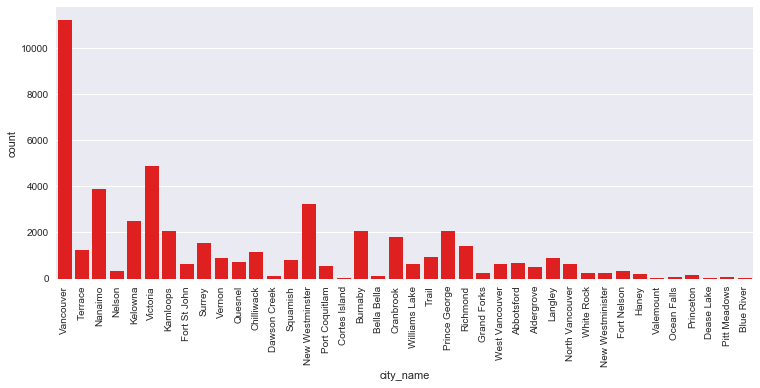

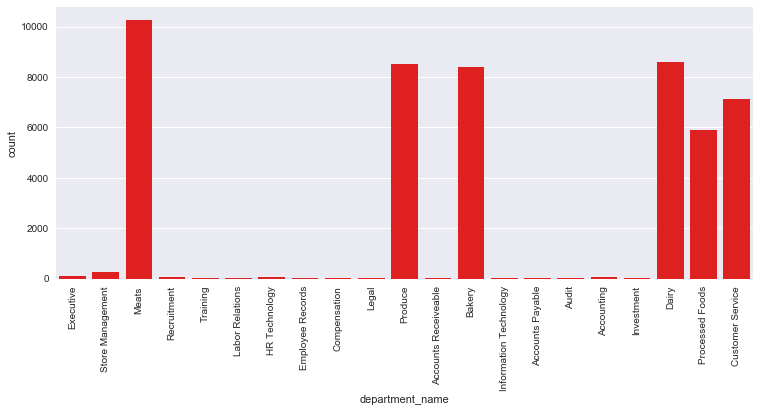

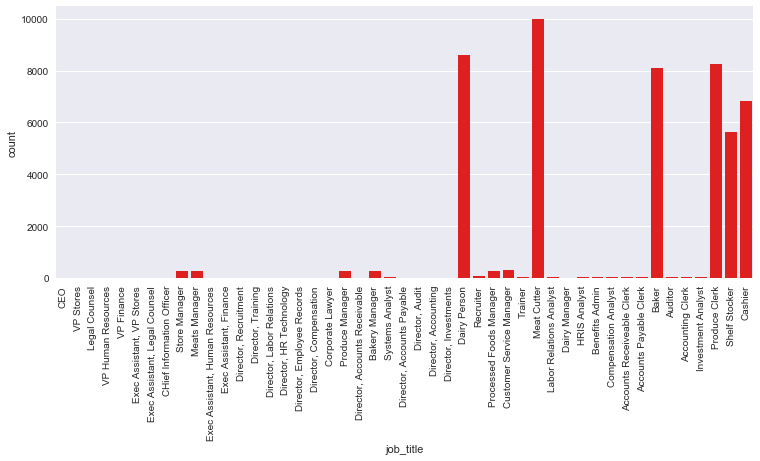

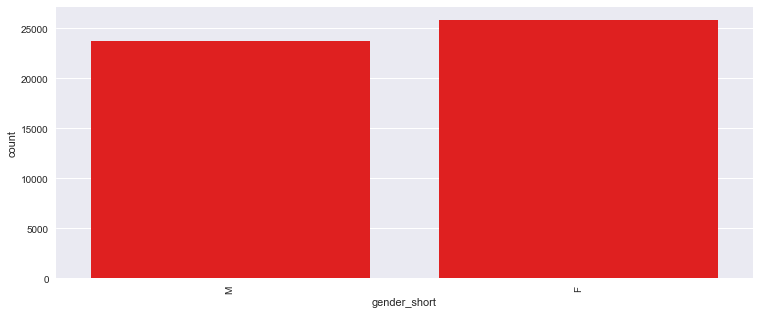

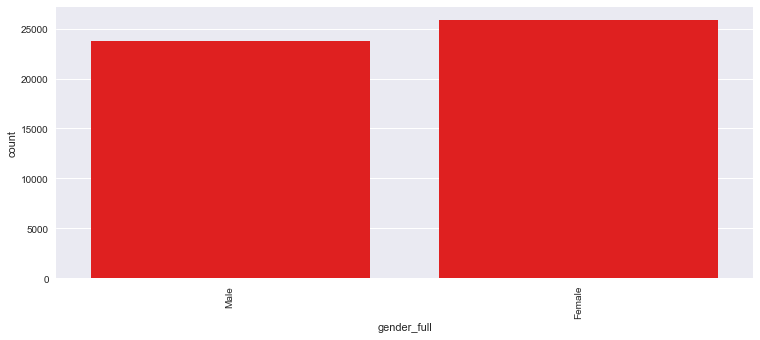

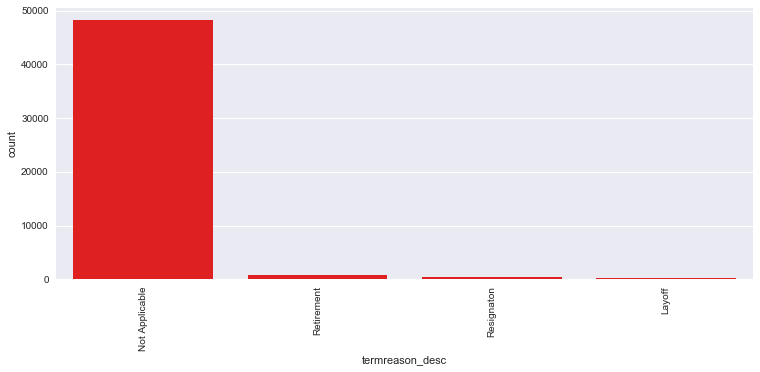

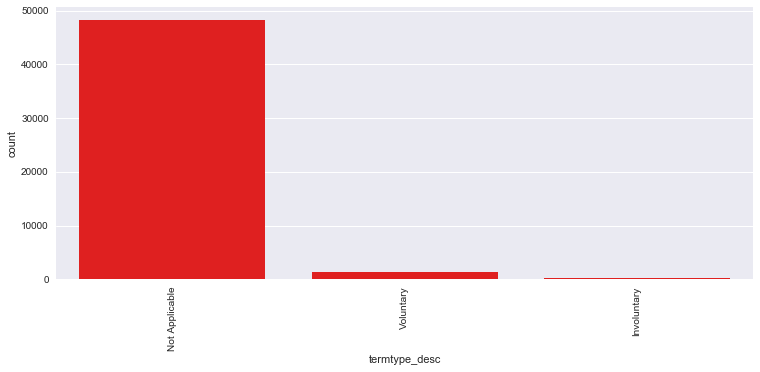

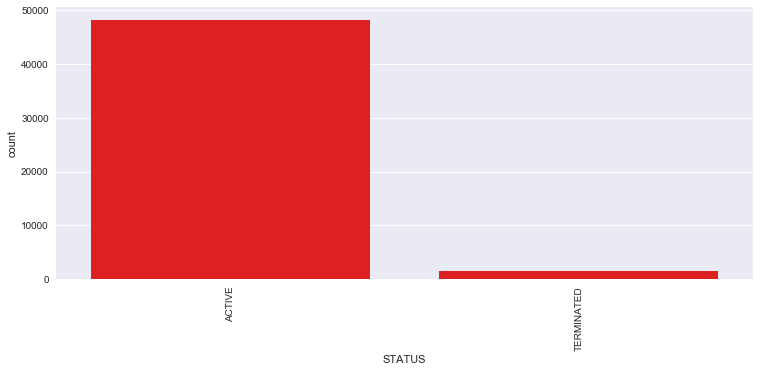

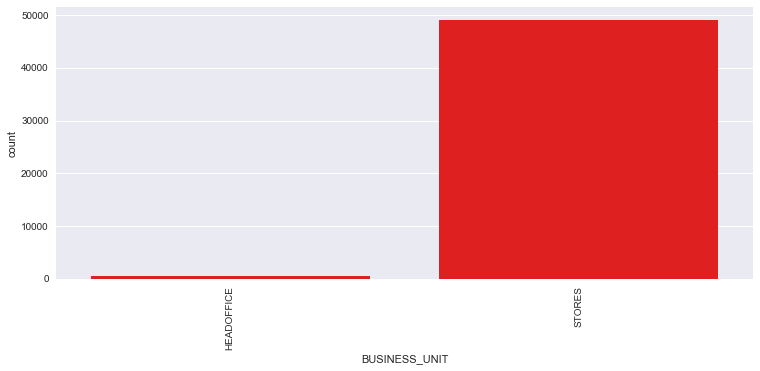

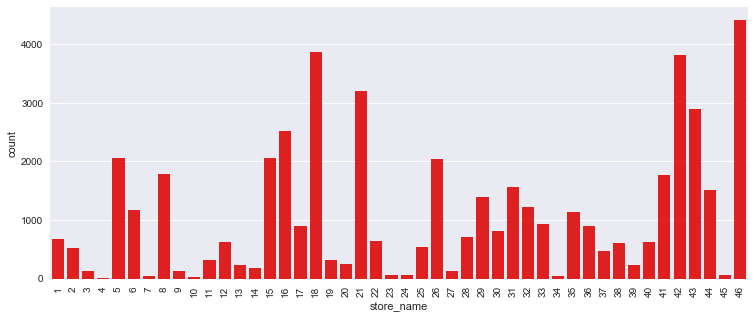

In [300]:
from matplotlib.pyplot import show, figure
from seaborn import countplot

for feature in categories:
    figure(figsize=(12.5,5))
    ax = countplot(data[feature], color="red")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    show()

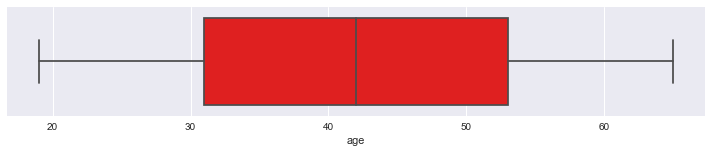

count   49,653.00
mean        42.08
std         12.43
min         19.00
25%         31.00
50%         42.00
75%         53.00
max         65.00
Name: age, dtype: float64

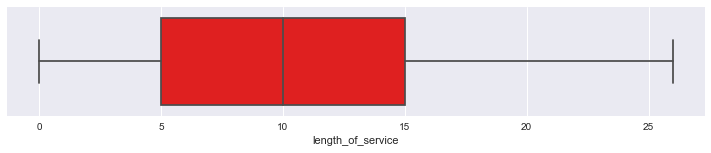

count   49,653.00
mean        10.43
std          6.33
min          0.00
25%          5.00
50%         10.00
75%         15.00
max         26.00
Name: length_of_service, dtype: float64

In [301]:
from seaborn import boxplot
from IPython.display import display
from pandas import options

options.display.float_format = "{:,.2f}".format

for feature in counts:
    
    figure(figsize=(12.5,2))
    ax = boxplot(data[feature], color="red")
    show()
    
    display(data[feature].describe())

## Data-driven para recursos humanos

In [302]:
import pandas as pd; pd.options.display.float_format = '{:,.3f}'.format
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = (8,6)
import seaborn as sns; sns.set_style("dark")

In [307]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'DailyRate', 
                   'HourlyRate', 'MonthlyRate', "EmployeeNumber"]

data = data.drop(columns_to_drop, axis=1)
columns = ["Attrition"] + [col for col in data.columns if col != "Attrition"]
data = data[columns].replace({"Yes": 1, "No": 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating      

,Age,YearsAtCompany,TotalWorkingYears
count,"1,470.000","1,470.000","1,470.000"
mean,36.924,7.008,11.280
std,9.135,6.127,7.781
min,18.000,0.000,0.000
25%,30.000,3.000,6.000
50%,36.000,5.000,10.000
75%,43.000,9.000,15.000
max,60.000,40.000,40.000


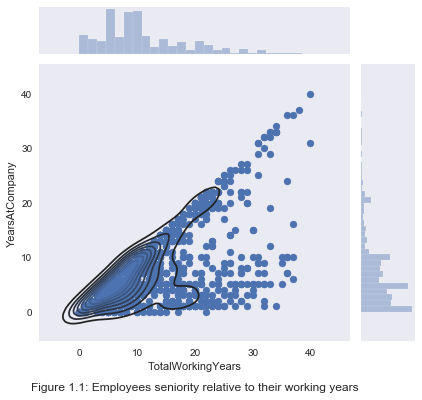

In [308]:
sns.jointplot(x="TotalWorkingYears", y="YearsAtCompany", data=data).plot_joint(sns.kdeplot)
plt.title("Figure 1.1: Employees seniority relative to their working years", y=-.2)
plt.subplots_adjust(bottom=.2)
data[["Age", "YearsAtCompany", "TotalWorkingYears"]].describe()

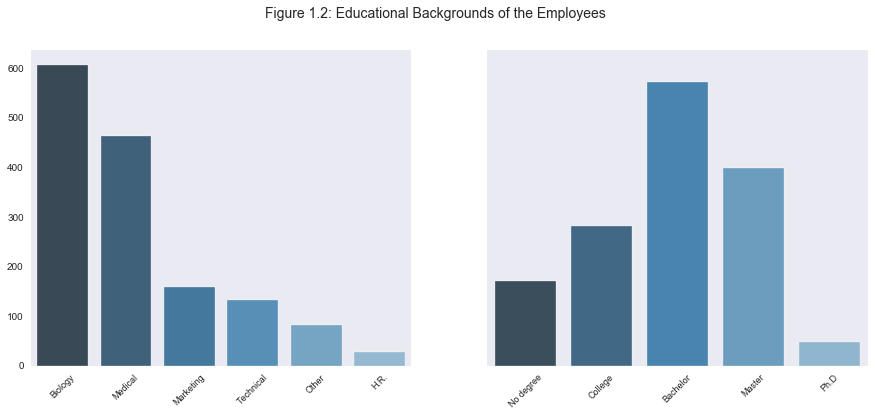

In [309]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

for i, (ax, label) in enumerate(zip([ax1, ax2], ["EducationField", "Education"])):
    vc = data[label].value_counts()
    if i == 1: vc = vc.sort_index()
    sns.barplot(x=vc.index, y=vc.values, palette="Blues_d", ax=ax)
    ax.set_xlabel("")
    [(label.set_fontsize(9), label.set_rotation(45)) for label in ax.get_xticklabels()]

study_fields = ["Biology", "Medical", "Marketing", "Technical", "Other", "H.R."]; ax1.set_xticklabels(study_fields)
diplomas = ["No degree", "College", "Bachelor", "Master", "Ph.D"]; ax2.set_xticklabels(diplomas)
ax2.yaxis.set_visible(False)
plt.suptitle("Figure 1.2: Educational Backgrounds of the Employees", size=14)
plt.subplots_adjust(bottom=.15);

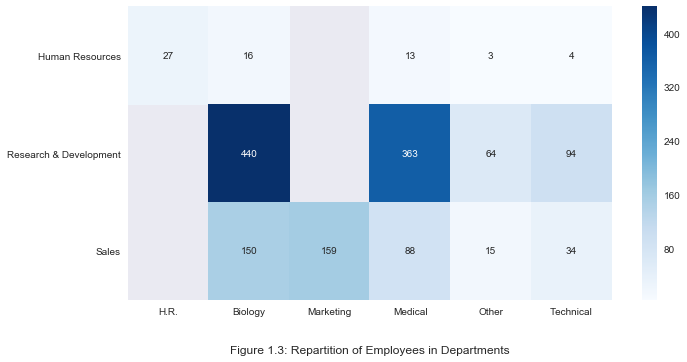

In [310]:
dept_field = (data.pivot_table(data, index="Department", columns="EducationField", aggfunc='size'))
plt.figure(figsize=(12,6))
sns.heatmap(dept_field, annot=True, cmap="Blues", fmt=".0f")
ax = plt.gca()
study_fields = ["H.R.", "Biology", "Marketing", "Medical", "Other", "Technical"]; ax.set_xticklabels(study_fields)
ax.set_xlabel(""); ax.set_ylabel("")
plt.subplots_adjust(left=.2, bottom=.2)
plt.title("Figure 1.3: Repartition of Employees in Departments", y=-.2);

In [311]:
performance = data.pivot_table(index=['EducationField', 'JobRole'], 
                               columns='PerformanceRating', 
                               values='Attrition', aggfunc='count')

performance['PercentageTopPerformers'] = performance[4] / (performance[3] + performance[4])
performance.sort_values('PercentageTopPerformers', ascending=False).drop([3,4], axis=1).head(10)

,PerformanceRating,PercentageTopPerformers
EducationField,JobRole,
Medical,Manager,0.375
Life Sciences,Human Resources,0.308
Other,Sales Executive,0.308
Technical Degree,Research Scientist,0.231
Other,Healthcare Representative,0.222
Marketing,Manager,0.214
Life Sciences,Manufacturing Director,0.211
Other,Manager,0.200
Life Sciences,Laboratory Technician,0.193


In [312]:
def plot_gender_repartition(data, **kwargs):
    caption = kwargs["caption"]; del kwargs["caption"]
    gender_repartition = data.groupby([kwargs["index"], kwargs["columns"]], as_index=False).count().pivot(**kwargs)
    gender_repartition["Total"] = gender_repartition["Male"] + gender_repartition["Female"]
    gender_repartition["Female"] = gender_repartition["Female"] / gender_repartition["Total"] * 100
    gender_repartition["Male"] = gender_repartition["Male"] / gender_repartition["Total"] * 100
    gender_repartition[["Female", "Male"]].plot(kind="barh", stacked=True, legend=False)
    ax = plt.gca()
    ax.axvline(50, color="k", zorder=0)
    format_chart(ax, True)
    label_barh_chart(ax)
    plt.title("{}: Gender Repartition by {}".format(caption, kwargs["index"]), y=-.2)
    plt.legend(bbox_to_anchor=(.7, 1.1), ncol=2)
    plt.subplots_adjust(left=.16, bottom=.2)
    
def format_chart(ax, multiline_labels=False, ticklabel_size=10):
    [spine.set_visible(False) for spine in ax.spines.values()]
    #[tl.set_visible(False) for tl in ax.get_xticklabels()]
    ax.yaxis.set_label_text("")
    [tl.set(fontsize=ticklabel_size) for tl in ax.get_yticklabels()]
    if multiline_labels:
        ylabels = ax.get_yticklabels()
        new_labels = [label.get_text()[::-1].replace(" ", "\n", 1)[::-1] for label in ylabels]
        ax.set_yticklabels(new_labels)
        
def label_barh_chart(ax):
    text_settings = dict(fontsize=9, fontweight='bold', color="w")
    rects = ax.patches
    for i, rect in enumerate(rects):
        width = rect.get_width()
        x_pos = width / 2 if i in range(len(rects) // 2) else 100 - width / 2
        #color = "pink" if i in range(len(rects) // 2) else "#2C6388"
        #rect.set_facecolor(color)
        label = "{:.1f}%".format(rect.get_width())
        ax.text(x_pos, rect.get_y() + rect.get_height()/2, label, ha='center', va='center', **text_settings)
        
def label_barchart(ax):
    text_settings = dict(fontsize=9, fontweight='bold', color="w")
    rects = ax.patches
    for i, rect in enumerate(rects):
        x_pos = rect.get_x() + rect.get_width() / 2
        label = "{:.1%}".format(rect.get_height())
        ax.text(x_pos, .05, label, ha='center', va='center', **text_settings)

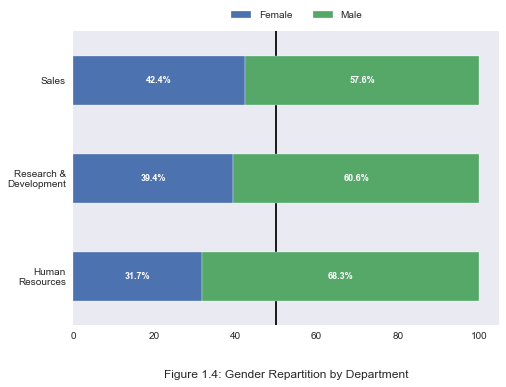

In [313]:
plot_gender_repartition(data, index="Department", columns="Gender", values="Attrition", caption="Figure 1.4")

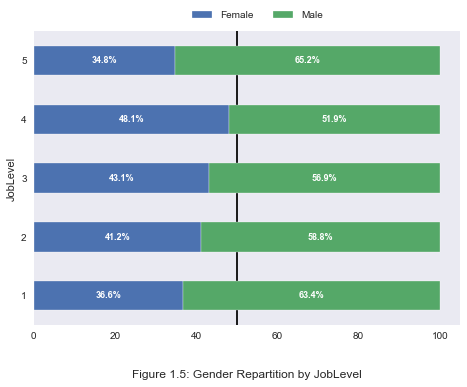

In [314]:
plot_gender_repartition(data, index="JobLevel", columns="Gender", values="Attrition", caption="Figure 1.5")
plt.gca().set_ylabel("JobLevel");

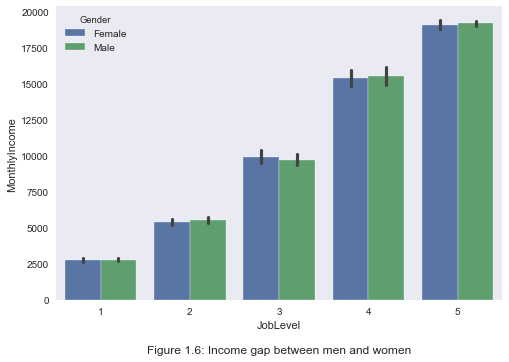

In [315]:
plt.figure()
sns.barplot(x="JobLevel", y="MonthlyIncome", hue="Gender", data=data, ci=99)
plt.title("Figure 1.6: Income gap between men and women", y=-.2)
plt.subplots_adjust(bottom=.2);

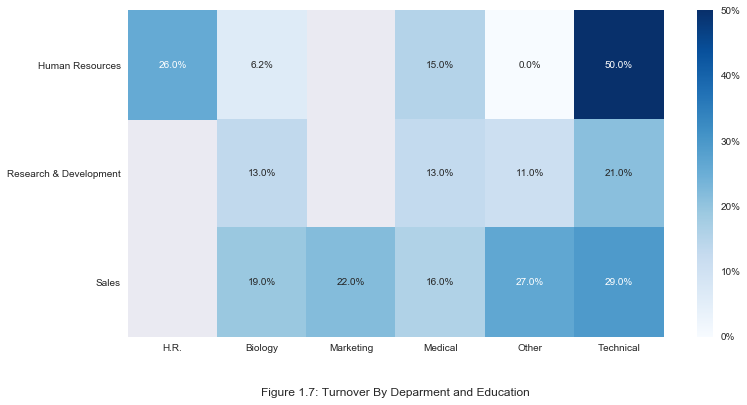

In [316]:
attrition_education = data.pivot_table(index="Department", values="Attrition", columns="EducationField", aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(attrition_education, annot=True, cmap="Blues")
ax1, ax2 = plt.gcf().get_axes()
ax1.set_xlabel(""); ax1.set_ylabel("")
study_fields = ["H.R.", "Biology", "Marketing", "Medical", "Other", "Technical"]; ax1.set_xticklabels(study_fields)
plt.title("Figure 1.7: Turnover By Deparment and Education", y=-.2)
[el.set_text("{:.1%}".format(float(el.get_text()))) for el in ax1.texts]
ax2.set_yticklabels(["{:.0%}".format(float(tl.get_text())) for tl in ax2.get_yticklabels()]);

In [317]:
data = data.replace({"Male": 1, "Female": 0, "Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})
X, y = pd.get_dummies(data.iloc[:, 1:].copy()), data.iloc[:, 0].copy()

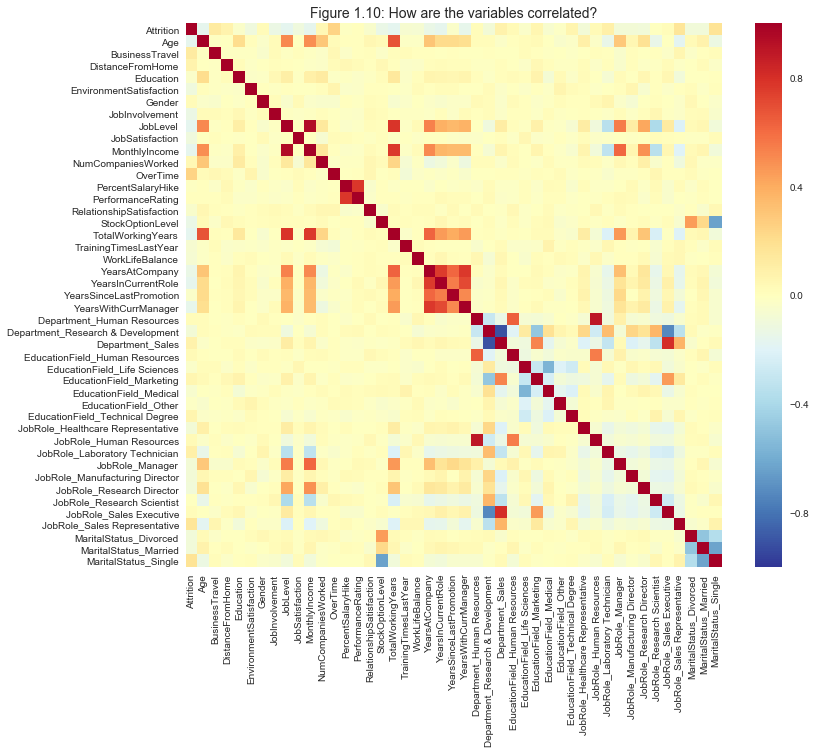

In [318]:
df = X.copy()
df["Attrition"] = y
df = df[["Attrition"] + list(X.columns)]
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap="RdYlBu_r", vmin=-1, vmax=1, ax=ax)
plt.title('Figure 1.10: How are the variables correlated?', size= 14);

In [319]:
from sklearn.model_selection import train_test_split
# Train / Test split (size of training set: 75 %)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train["MonthlyIncome"] = scaler.fit_transform(X_train[["MonthlyIncome"]])[0]
#X_test.loc[:, "MonthlyIncome"] = scaler.transform(X_test[["MonthlyIncome"]])
#X_train["MonthlyIncome"]
X_train = X_train.copy(); X_test = X_test.copy()
X_train["MonthlyIncome"] = scaler.fit_transform(X_train[["MonthlyIncome"]])[:,0]
X_test["MonthlyIncome"] = scaler.transform(X_test[["MonthlyIncome"]])[:, 0]

In [321]:
from sklearn.feature_selection import SelectKBest

# Confidence Threshold
alpha = .1

np.random.seed(42)  # To make sure our results are reproducible
anova_filter = SelectKBest()
anova_filter.fit(X_train, y_train)


anova_scores = pd.DataFrame(index=X.columns)

anova_scores["Fisher"] = anova_filter.scores_
anova_scores["p-value"] = anova_filter.pvalues_
anova_scores = anova_scores.sort_values("Fisher", ascending=False)
selected_features = list(anova_scores.loc[anova_scores["p-value"] < 1 - alpha, :].index)
if len(selected_features) == X.shape[1]:
    print("No discarded feature")
X = X[selected_features]
anova_scores.style.apply(lambda f: ["color: red"] * 2 if f["p-value"] > 1-alpha else ["color: black"]*2, axis=1)

,Fisher,p-value
OverTime,74.2659,2.34103e-17
JobLevel,37.961,1.01092e-09
MonthlyIncome,34.7847,4.89564e-09
TotalWorkingYears,31.7091,2.27257e-08
YearsInCurrentRole,28.3348,1.2364e-07
JobRole_Sales Representative,26.9643,2.46769e-07
MaritalStatus_Single,26.8852,2.56822e-07
Age,24.8236,7.29152e-07
BusinessTravel,24.0944,1.05586e-06
YearsWithCurrManager,20.1872,7.76386e-06


In [322]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

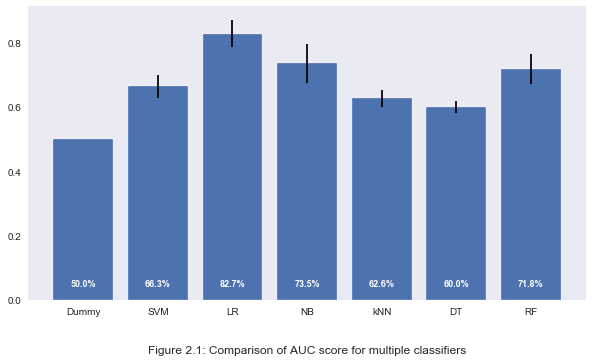

In [323]:
from collections import OrderedDict

scoring = "roc_auc"

models = [
    
    ("Dummy", DummyClassifier(strategy="most_frequent")),
    ("SVM", SVC()), 
    ("LR", LogisticRegression()),
    ("NB", GaussianNB()),
    ("kNN", KNeighborsClassifier()),
    ("DT", DecisionTreeClassifier()), 
    ("RF", RandomForestClassifier())

]

results = OrderedDict()
for name, model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    
results = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.bar(range(results.shape[1]), results.mean(), yerr=results.std())
plt.gca().set_xticklabels([""] + list(results.columns) + [""])
plt.title("Figure 2.1: Comparison of AUC score for multiple classifiers", y=-.2)
plt.subplots_adjust(bottom=.2)
label_barchart(plt.gca())

In [324]:
n_features = X_train.shape[1]

classifiers = [
    ("LogisticRegression", LogisticRegression()), 
    ("RandomForest", RandomForestClassifier(n_estimators=50)),
    ("GaussianNB", GaussianNB())
]

all_params = {
    "LogisticRegression": {"penalty": ["l1", "l2"], "C": np.logspace(-3, 3, 7), "class_weight":["balanced", None]}, 
    "RandomForest": {
        "max_features": range(5, n_features, (n_features - 5) // 3), 
        "max_depth": range(3, 6, 2),
        "min_samples_split": range(5, 101, 25)
    },
    "GaussianNB": {"priors": [None, [.161, .839]]}
}
results = pd.DataFrame(index=[item[0] for item in classifiers], 
                       columns=["name", "params", "accuracy", "auc_score_tr", "auc_score_te", 
                                "precision", "recall", "fscore", "support", "TP", "FP", "FN", "TN"])


best_models, scores = [], []
for i, ((name, clf)) in enumerate(classifiers):
    params = all_params[name]
    gs = GridSearchCV(clf, params).fit(X_train, y_train)
    best_models.append(gs.best_estimator_)
    y_pred = gs.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    auc_score_te = roc_auc_score(y_test, y_pred)
    auc_score_tr = gs.best_score_
    accuracy = (y_pred == y_test).mean()
    params = gs.best_params_
    [[TP, FN], [FP, TN]] = confusion_matrix(y_test, y_pred)
    results.loc[name, :] = (name, params, accuracy, auc_score_tr, auc_score_te, precision, 
                            recall, fscore, support, TP, FP, FN, TN)
    
    scores.append(roc_auc_score(y_test, y_pred))
    gs_results = pd.DataFrame(gs.cv_results_).drop("params", axis=1).sort_values("rank_test_score")
    print("\n{}:\n".format(name))
    print("\tAccuracy: {:.2%}".format((y_pred == y_test).mean()))
    print("\tAUC Score (Train set): {:.2%}".format(gs.best_score_))
    print("\tAUC Score (Test set): {:.2%}\n".format(scores[-1]))
    print(classification_report(y_test, y_pred))
    print(best_models[-1], "\n")
    if i + 1 < len(classifiers): print("#" * 90)
    
#results


LogisticRegression:

	Accuracy: 88.86%
	AUC Score (Train set): 87.30%
	AUC Score (Test set): 67.58%

             precision    recall  f1-score   support

          0       0.88      1.00      0.94       306
          1       0.96      0.35      0.52        62

avg / total       0.90      0.89      0.87       368

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

##########################################################################################

RandomForest:

	Accuracy: 86.68%
	AUC Score (Train set): 85.75%
	AUC Score (Test set): 60.48%

             precision    recall  f1-score   support

          0       0.86      1.00      0.93       306
          1       1.00      0.21      0.35        62

avg / total       0.89      0.87      0.83       368

RandomForestCl

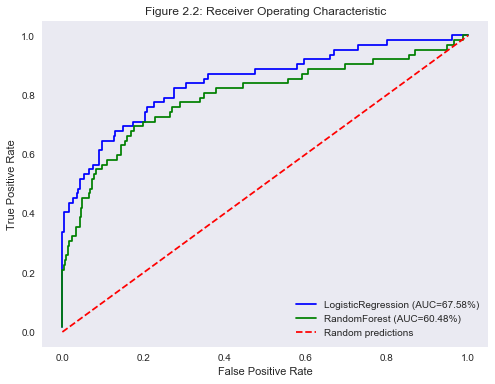

In [325]:
lr_scores = best_models[0].predict_proba(X_test)[:, 1]
rf_scores = best_models[1].predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test.ravel(), lr_scores.ravel())
rf_fpr, rf_tpr, _ = roc_curve(y_test.ravel(), rf_scores.ravel())
plt.plot(lr_fpr, lr_tpr, 'b', label='LogisticRegression (AUC={:.2%})'.format(scores[0]))
plt.plot(rf_fpr, rf_tpr, 'g', label='RandomForest (AUC={:.2%})'.format(scores[1]))
plt.title('Figure 2.2: Receiver Operating Characteristic')
plt.plot([0,1],[0,1],'r--', label="Random predictions")
plt.legend(loc=4)
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate');

In [326]:
clf = best_models[0]
coef = pd.DataFrame(index=X_train.columns)
coef["Coefficients"] = clf.coef_[0]
coef.sort_values("Coefficients", ascending=False)

,Coefficients
OverTime,1.308
BusinessTravel,0.729
MaritalStatus_Single,0.429
PerformanceRating,0.379
JobRole_Laboratory Technician,0.340
EducationField_Technical Degree,0.334
Department_Sales,0.296
JobRole_Sales Representative,0.234
Gender,0.208
NumCompaniesWorked,0.151
